<a href="https://colab.research.google.com/github/Maksym4363467/Havryliuk-Python-for-big-data/blob/master/python_practice_10_havryliuk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Оцінювання наявності даної роботи буде враховувати як наявність самих візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання не буде зараховане за наявне.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [11]:
# cell for imports. All imports must go here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [5]:
df_1 = pd.read_csv('train.csv')
print(df_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
print(df_1.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

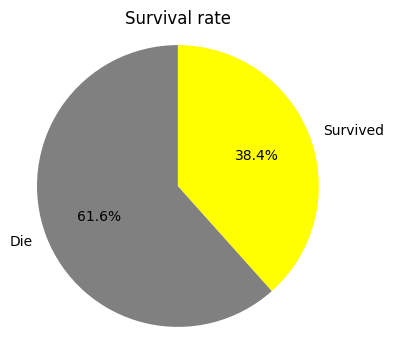

In [10]:
survival = df_1['Survived'].value_counts()
labels = ['Die', 'Survived']
colors = ['grey', 'yellow']

plt.figure(figsize=(4,4))
plt.pie(survival, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Survival rate')
plt.axis('equal')
plt.show()

Приблизно кожен третій пасажир зміг вижити.
Відсоток загиблих склав 61,6

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


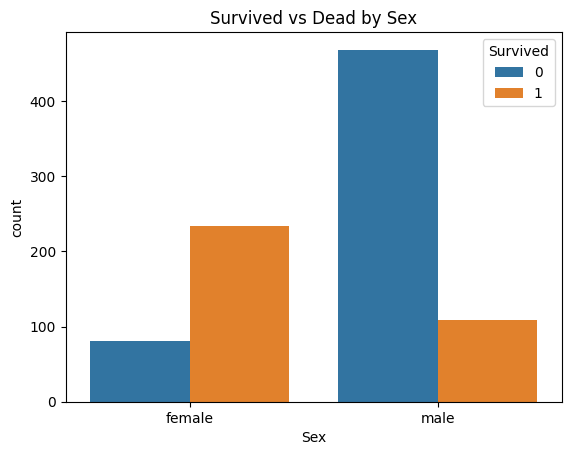

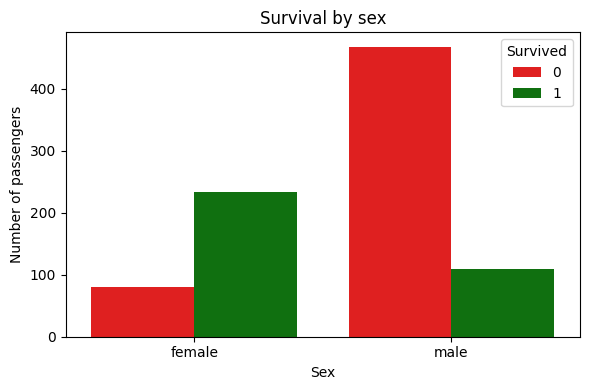

In [26]:
sex_survival = df_1.groupby(['Sex', 'Survived'], as_index=False).size()

plt.figure(figsize=(6, 4))
barplot = sns.barplot(data=sex_survival, x='Sex', y='size', hue='Survived', palette=['red', 'green'])

plt.title('Survival by sex')
plt.ylabel('Number of passengers')

handles, labels = barplot.get_legend_handles_labels()
plt.legend(handles, ['0', '1'], title='Survived')

plt.tight_layout()
plt.show()

Як пропорціонально так і номінально найбільше загиблих серед чоловіків

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

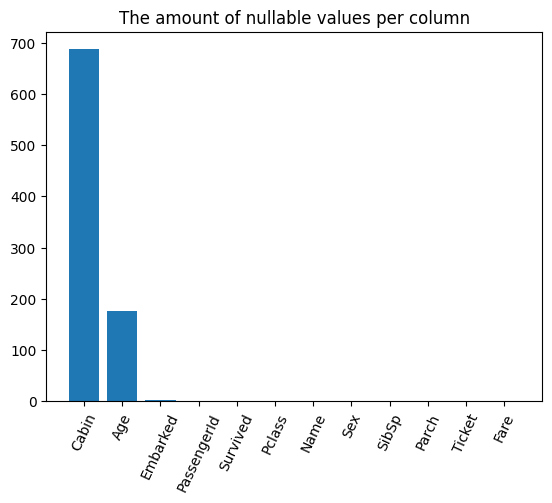

Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64


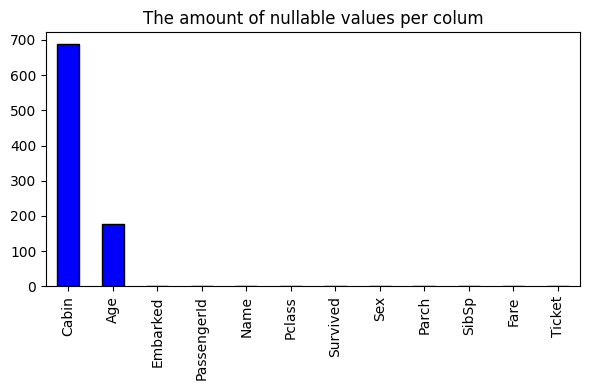

In [44]:
missing_values = df_1.isnull().sum()
missing_values = missing_values.sort_values(ascending=False)
plt.figure(figsize=(6, 4))
missing_values.plot(kind='bar', color='blue', edgecolor='black')
plt.title('The amount of nullable values per colum')
print(missing_values)
plt.tight_layout()
plt.show()

Найбільше пропуених даних стосуються номеру посадкового місця пасажирів, пропущено блищько трьох четвертих даних. Повертаючись до завдання №2 можно побачити що це дуже подібно на показники тих кому не вдалось врятуватись або пасажир був занадто заклопотанний власним порятунком, щоб запамятати своє місце

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

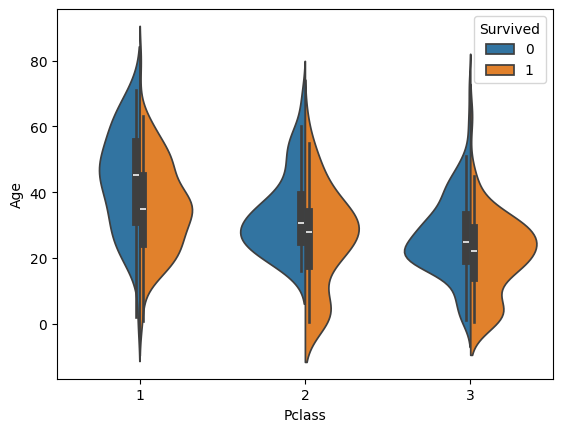

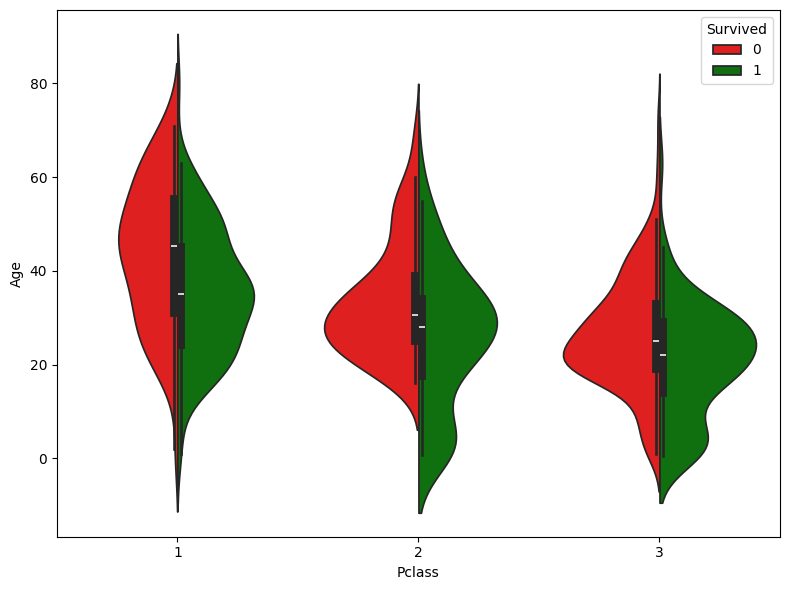

In [55]:
plt.figure(figsize=(8, 6))

sns.violinplot(data=df_1, x='Pclass', y='Age', hue='Survived', split=True, palette=['red', 'green'])

plt.xlabel('Pclass')
plt.ylabel('Age')
plt.legend(title='Survived')
plt.tight_layout()

plt.show()

У 1-му класі частка тих, хто вижив, значно вища, ніж тих, хто не вижив. Особливо це стосується пасажирів середнього віку (30–50 років).
У 3-му класі найросповсюдженіша молода демографія (20-30 років), що по'вязано з економічними факторами. Також в 3-му та 2-му класі кількість загиблих значно перевищує кількість врятованих, що можна пов'язати з розміщенням цих місць з найбільшим віддаленям від рятувальних човнів та найбижче до ватерлінії.  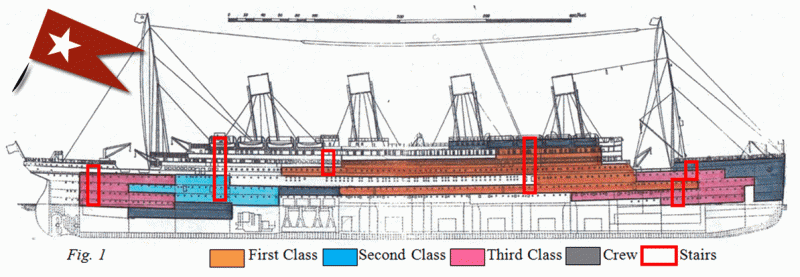

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


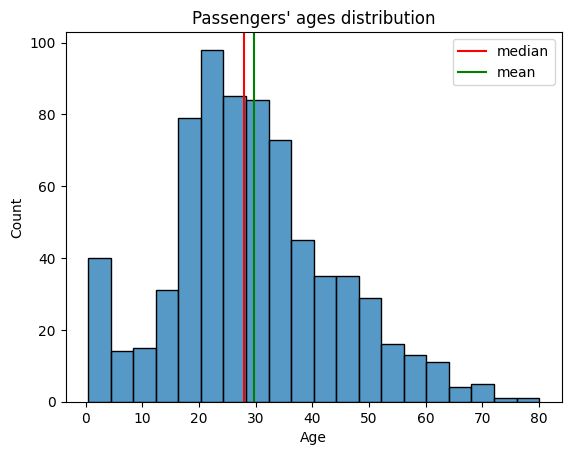

Text(0.5, 1.0, 'Distribution of Passenger Ages')

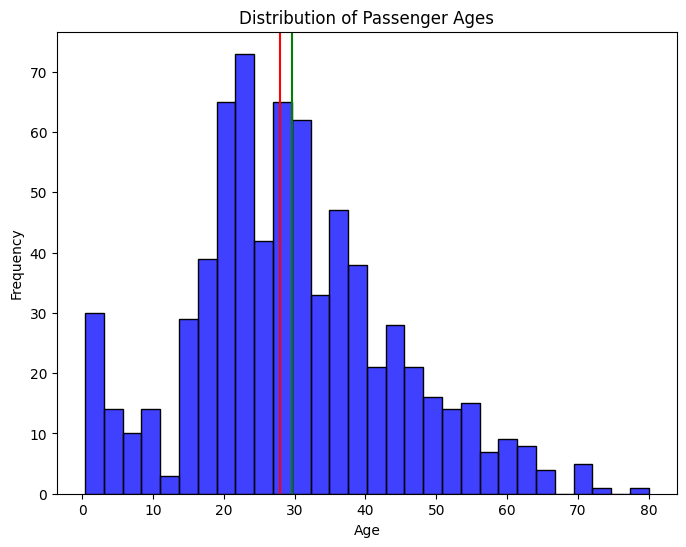

In [63]:
mean_age = df_1['Age'].mean()
median_age = df_1['Age'].median()
plt.figure(figsize=(8, 6))

sns.histplot(data=df_1, x='Age', bins=30, color='blue')
plt.axvline(mean_age, color='green')
plt.axvline(median_age, color='red')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Passenger Ages')

Віковий розподіл має пік в проміжку 20-30 років, що є типічним для демографічних трендів в Європі ХХ ст. Розподіл ділиться навпіл на показнику близькомудо 30.

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

Як стать та клас впливають на ймовірність виживання

<Figure size 800x600 with 0 Axes>

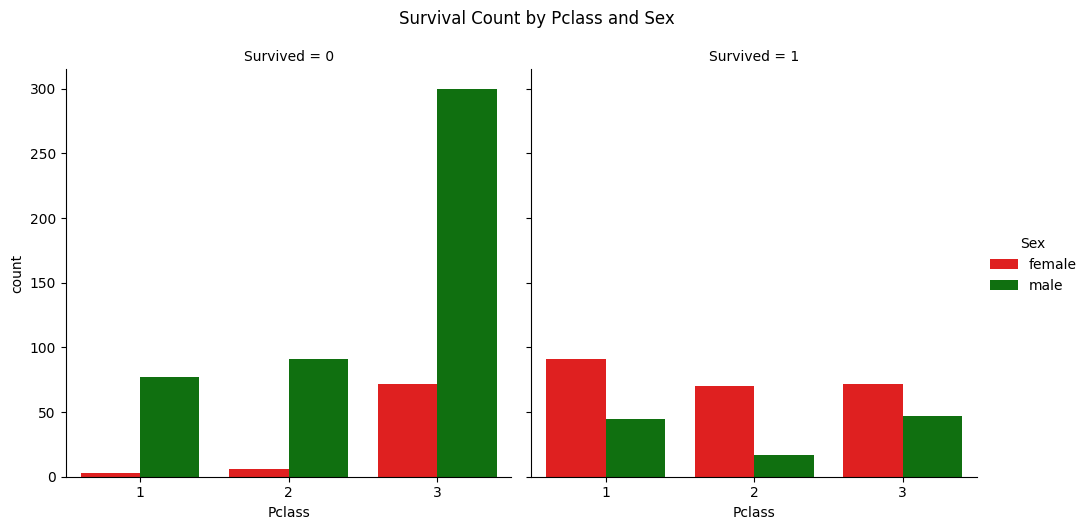

In [65]:
plt.figure(figsize=(8, 6))
sns.catplot(data=df_1, x='Pclass', hue='Sex', col='Survived', kind='count', palette=['red', 'green'])

plt.suptitle('Survival Count by Pclass and Sex', y=1.05)

plt.show()

Жінки мають значно вищу кількість виживших у всіх класах, особливо в 1-му та 2-му, де їх виживання переважає, тоді як у 3-му класі різниця менша. Чоловіки переважно не вижили, особливо в 3-му класі, де їх кількість серед загиблих найбільша, а серед виживших — мінімальна. Це підкреслює сильний вплив гендерних норм та соціального статусу на виживання під час катастрофи. Тому висновок дуже простий, щоб мати найбільші шанси на виживання потрібно не бути бідним)))

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

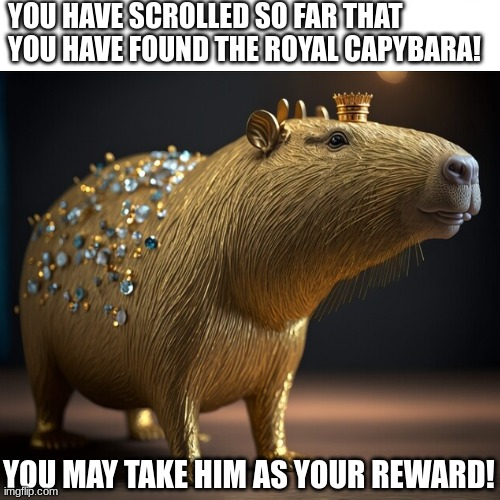